In [2]:
import seaborn as sb


In [3]:
%matplotlib inline
tips = sb.load_dataset('tips')

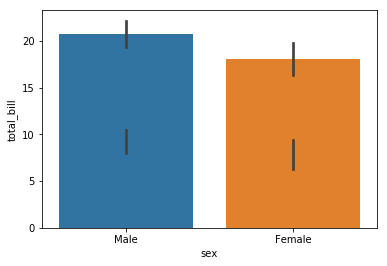

In [8]:
#categorical plots 
import numpy as np
sb.barplot(x='sex',y='total_bill',data=tips)#default is average
sb.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

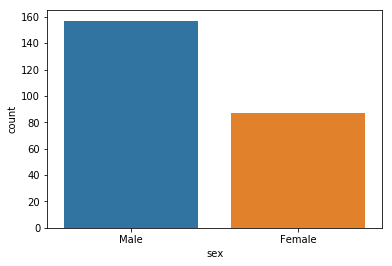

In [9]:
# we can have count plot 
sb.countplot(x='sex',data=tips)

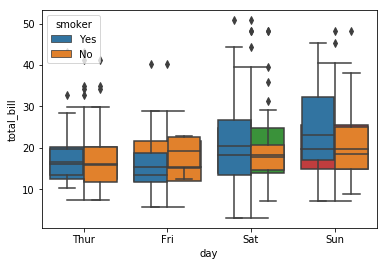

In [4]:
# box or viscoral plot 
sb.boxplot(x='day',y='total_bill',data=tips)
sb.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

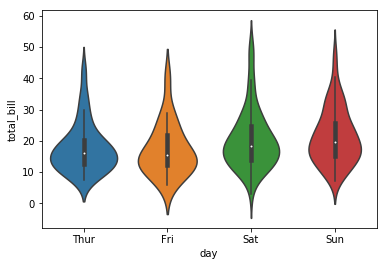

In [13]:
sb.violinplot(x='day',y='total_bill',data=tips)

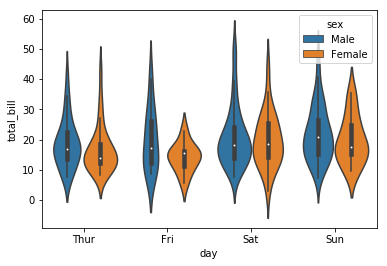

In [7]:
sb.violinplot(x='day',y='total_bill',data=tips,hue='sex')
#sb.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\categorical.py:2567: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


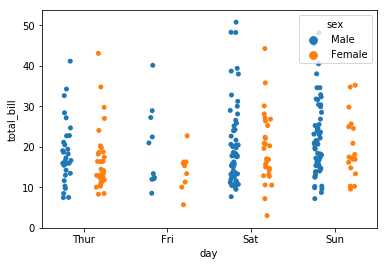

In [10]:
#strip plot
sb.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex',split=True)

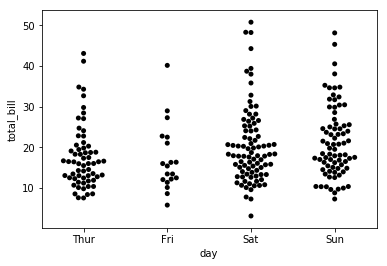

In [11]:
# combination of strip and violin plot # R& D purpose mostly
sb.swarmplot(x='day',y='total_bill',data=tips,color='black')

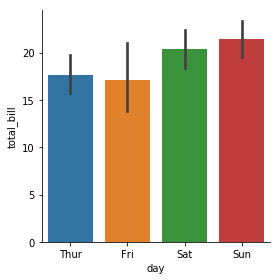

In [12]:
#factor plot 
sb.factorplot(x='day',y='total_bill',data=tips,kind='bar')

In [14]:
flights = sb.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [20]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [19]:
# Heat maps, should be in matrix form
# Index should be relatble to columns not like 0,1,2,3
# We do it using pivot operation or corelation 

# Corelation greater the positive that it is strongly influnce
# Negative not much impact 
# 1 when its corelation to its own column
tc=tips.corr() # as expected does for numeric columns
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


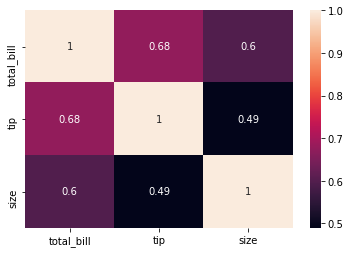

In [27]:
sb.heatmap(tc,annot=True) # to see values 


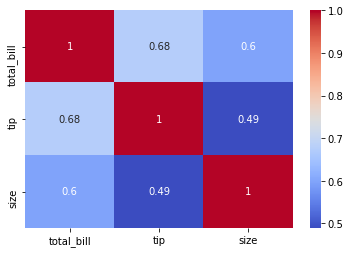

In [26]:
# we see t
sb.heatmap(tc,annot=True,cmap='coolwarm') # color map

In [29]:
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


In [30]:
fp =flights.pivot_table(index='month',columns='year',values='passengers')
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


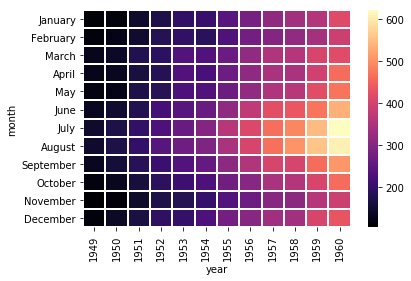

In [31]:
# idea is to see how flights increase over the time 
# which month we have more flights
# magma is about dark to light pattern
# Line color and line width very use full to have separation between boxes
sb.heatmap(data=fp,cmap='magma',linecolor='white',linewidths=1)

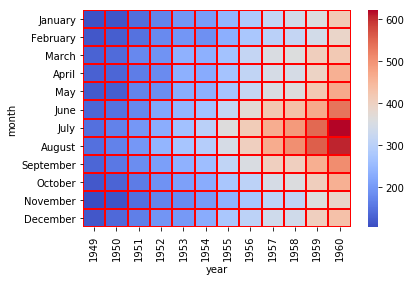

In [33]:
sb.heatmap(data=fp,cmap='coolwarm',linecolor='red',linewidths=1)

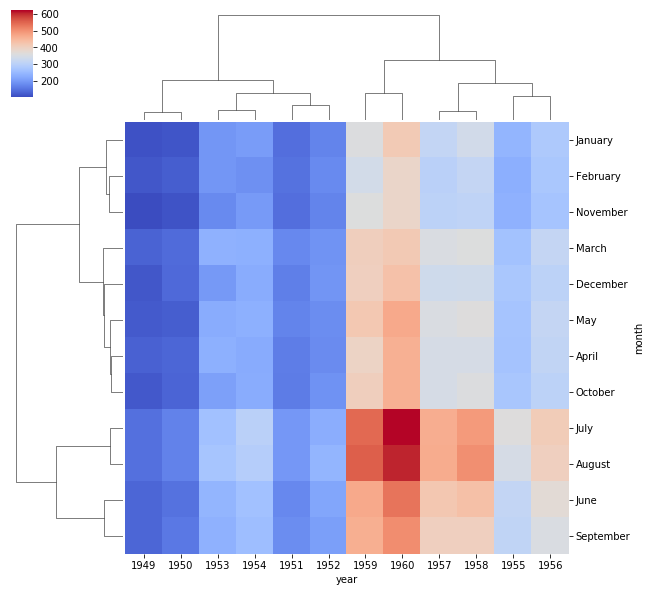

In [35]:
# Cluster map 
# to cluster similar columns
# we can see that x axis 1959,1960 are pretty close
# Even the months of june july
sb.clustermap(data=fp,cmap='coolwarm')

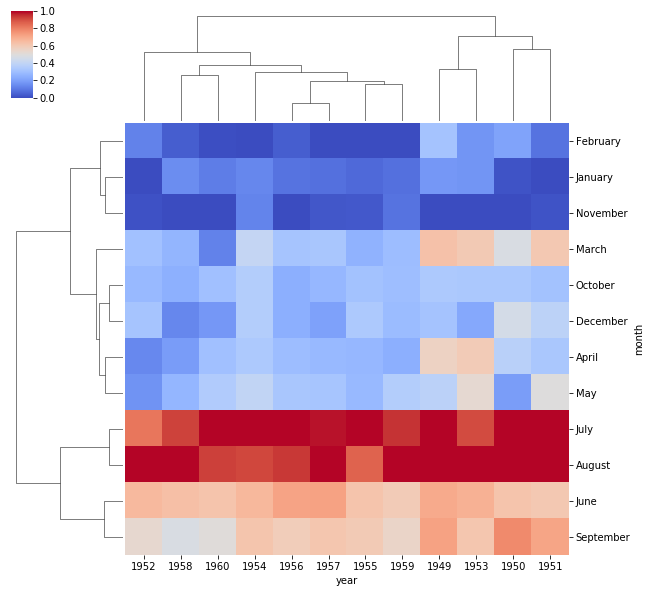

In [36]:
# To re run using standard scale 
sb.clustermap(data=fp,cmap='coolwarm',standard_scale=1)

In [37]:
# Grids
iris = sb.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [39]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

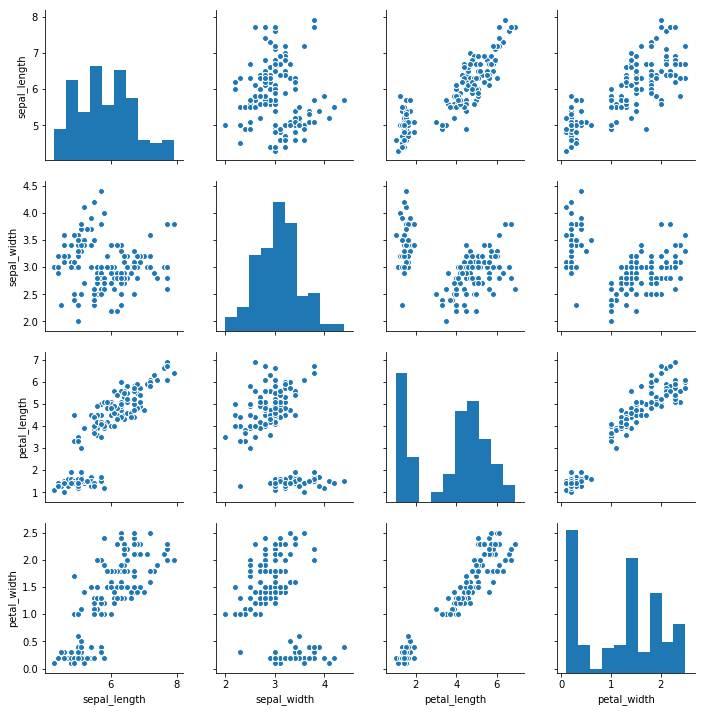

In [40]:
sb.pairplot(iris)

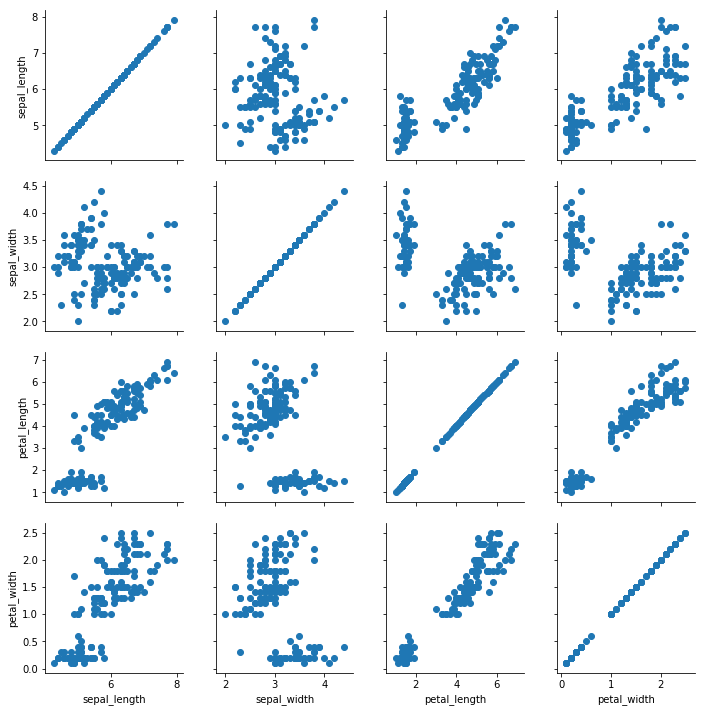

In [44]:
import matplotlib.pyplot as plt

pg= sb.PairGrid(iris) # simplified version
pg.map(plt.scatter)

In [ ]:
pg.map_diag()